## Análise preço das casas em  Melbourne 

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

%matplotlib inline

In [2]:
from main import Houses
dataframe = Houses()
dataframe.getHead().head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,120.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,120.0


df.shape full data = (34857, 21)

data.shape dropped data = (8885, 22)

It's very different! With Nan values, the dataset's size is 34857 rows and without nan values, only 8887 rows. There are 25,970 fewer cases, a big loss.

### Exploratory Data Analysis

C:\Users\letic\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\letic\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\letic\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

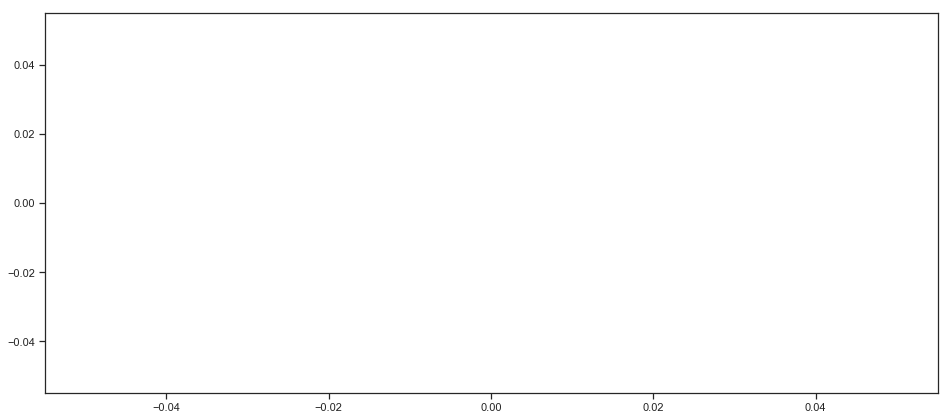

In [4]:
plt.figure(figsize=(16,7))
sns.distplot(dataframe.data['Age'], kde = False,hist_kws=dict(edgecolor="k"))

In [ ]:
# df['CouncilArea'].value_counts()

In [ ]:
# df['Regionname'].value_counts()

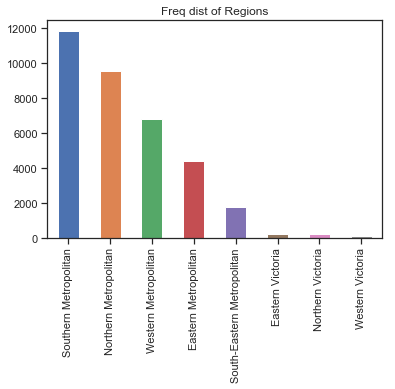

In [5]:
dataframe.data['Regionname'].value_counts().plot.bar(title='Freq dist of Regions')

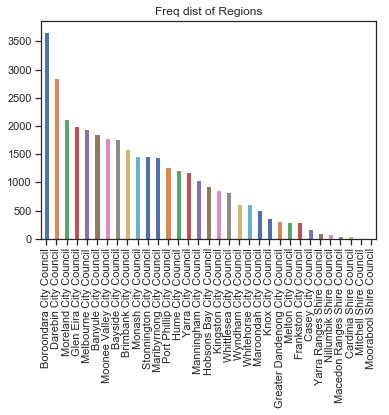

In [6]:
dataframe.data['CouncilArea'].value_counts().plot.bar(title='Freq dist of Regions')

In [ ]:
# use the pairplot to plot bivariate distributions and uderstand the relationship between two variables

sns.pairplot(df, vars=['Rooms','Price', 'Bedroom2', 'Bathroom', 'Car',
        'Age', 'Propertycount'], hue='Regionname', palette='husl' )

In [ ]:
# Correlation between some variables with one another (All dataset)

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

The dataset has many Nan values, which can cause problems in the model. I will do two approaches. The first eliminating lines (dropna) with missing values and the second with the imputation of value. The proposal is to see the impact on the data and there is a difference in the results of the model.


In [ ]:
# First: Count of missing values
#df.isnull().sum()

In [ ]:
# Percentage of Nan values
#df.isnull().sum()/len(df)*100

In [ ]:
# Using dropna() function   
#df_dropp = df.dropna() 

In [ ]:
#df_dropp.isnull().sum()

In [ ]:
# Distplot to plot and analyze the univariate distribution of the numerical columns

col_names = ['Rooms','Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','YearBuilt', 'Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df_dropp[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()


In [ ]:
# Use the pairplot to plot bivariate distributions and uderstand the relationship between two variables

sns.pairplot(df_dropp, vars=['Rooms','Price', 'Bedroom2', 'Bathroom', 'Car',
        'Age', 'Propertycount'], hue='Regionname', palette='husl' )

In [ ]:
# Correlation between some variables with one another (without Nan values)

plt.figure(figsize=(15,10))
sns.heatmap(df_dropp.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

### Random Forest Regression model

Now I'll do some tests with a random forest model.

In [ ]:
# Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


#### Imputation 

In [ ]:
# next steps

#df_fitered = df.fillna(df.mean(), inplace=True)